In [1]:
from collections import Counter, defaultdict
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats
from tabulate import tabulate

set_matplotlib_formats("svg")

In [2]:
here = Path().resolve()
affiliations_path = here.joinpath("affiliations.tsv")
authors_path = here.joinpath("authors.tsv")


In [3]:
person_rename = {
    "Cristina Casals Casas": "Cristina Casals-Casas",
    "Chris Mungall": "Christopher J. Mungall",
    "Cathy H Wu": "Cathy Wu",
    "Frederic B. Bastian": "Frédéric B. Bastian",
    "Frédéric Bastian": "Frédéric B. Bastian",
    "Josie Burgin": "Josephine Burgin",
    "Kristian Axelsen": "Kristian B. Axelsen",
    "Lynn Schriml": "Lynn M Schriml",
    "Mark Miller": "Mark A. Miller",
    "Nicole A Vasilevsky": "Nicole A. Vasilevsky",
    "Nicole Vasilevsky": "Nicole A. Vasilevsky",
    "Paul D. Thomas": "Paul Denis Thomas",
    "Paul Thomas": "Paul Denis Thomas",
    "Rene Ranzinger": "René Ranzinger",
    "Sujay Patil": "Sujay Sanjeev Patil",
    "Susan Bello": "Susan M. Bello",
    "Tarcisio Mendes De Farias": "Tarcisio Mendes de Farias",
    "Chris Hunter": "Christopher Hunter",
    "James Balhoff": "James P. Balhoff",
    'Andrew Leach': 'Andrew R. Leach',
    'Cynthia Smith': 'Cynthia L Smith',
    'Eloy Felix': 'Eloy Félix',
    'Juan F. Mosquera': 'Juan Felipe Mosquera',
    'Kiyoko Aoki-Kinoshita': 'Kiyoko F Aoki-Kinoshita',
}
affiliation_rename = {
    "SIB": "Swiss Institute of Bioinformatics",
    "SIB Swiss Institute of Bioinformatics": "Swiss Institute of Bioinformatics",
    "Swiss-Prot group, SIB Swiss Institute of Bioinformatics": "Swiss Institute of Bioinformatics",
    "Paul Thomas Lab, University of Southern California (USC)": "University of Southern California",
    "EMBL-European Bioinformatics Institute, Wellcome Genome Campus, Hinxton, Cambridge, UK": "EMBL-EBI",
    "European Bioinformatics Institute (EMBL-EBI)": "EMBL-EBI",
    "University of Lausanne (UNIL)": "University of Lausanne",
    "Universite de Lausanne": "University of Lausanne",
    "Complex Carbohydrate Research Center, The University of Georgia": "University of Georgia",
    "Complex Carbohydrate Research Center, University of Georgia": "University of Georgia",
    "The George Washington University": "George Washington University",
    "LBNL": "Lawrence Berkeley National Laboratory",
    "Environmental Genomics and Systems Biology Division, Lawrence Berkeley National Laboratory, Berkeley, CA, USA": "Lawrence Berkeley National Laboratory",
    "Swiss Institute of Bioinformatics / Swiss-Prot group": "Swiss Institute of Bioinformatics",
    "EMBL EBI": "EMBL-EBI",
    "EMBL/EBI": "EMBL-EBI",
    "EMBl/EBI": "EMBL-EBI",
    "European Bioinformatics Institute": "EMBL-EBI",
    "European Molecular Biology Laboratory, European Bioinformatics Institute (EMBL-EBI)": "EMBL-EBI",
    "University of Luxembourg, Luxembourg Centre for Systems Biomedicine": "University of Luxembourg",
    "Palacky University in Olomouc, Faculty of Science, Department of Physical Chemistry": "Palacký University Olomouc",
    "Placky University Olomouc": "Palacký University Olomouc",
    "Department of Biomedical Sciences, University of Padova": "University of Padova",
    "European Molecular Biology Laboratory, European Bioinformatics Institute": "EMBL-EBI",
    "University of Colorado, Anschutz Medical Campus": "University of Colorado",
    "European Bioinformatics Institute (EMBL-EBI), Wellcome Genome Campus, Hinxton, CB10 1SD, UK.": "EMBL-EBI",
    "European Bioinformatics Institute, EMBL-EBI": "EMBL-EBI",
    "WormBase, Alliance of Genome Resources, California Institute of Technology": "California Institute of Technology",
    "FlyBase, University of Cambridge": "University of Cambridge",
    "Luddy School of Informatics, Computing, and Engineering, Indiana University, Bloomington, IN 47408, USA": "Indiana University",
    "CBCB and CIS Department, University of Delaware": "University of Delaware",
    "SIB and HES-SO (HEG)": "Swiss Institute of Bioinformatics",
    'HGNC EMBL-EBI and University of Cambridge': [
        "EMBL-EBI",
        'University of Cambridge',
    ],
    'Universidade de São Paulo': 'University of São Paulo',
    'Rat Genome Database, Medical College of Wisconsin': 'Medical College of Wisconsin',
    'ScitBite': 'SciBite',
    'HGNC EMBL-EBI': "EMBL-EBI",
    "Keck School of Medicine, University of Southern California": "University of Southern California",
    "EPFL": "Ecole Polytechnique Fédérale de Lausanne",
    "Glycosciences Laboratory, Imperial College London": "Imperial College London",
    "Department of Botany and Plant Pathology, Oregon State University": "Oregon State University",
    "FlyBase/University Cambridge": "University of Cambridge",
    "Swiss-Prot group, SIB Swiss Institute of Bioinformatics (SIB)": "Swiss Institute of Bioinformatics",
    "EBI": "EMBL-EBI",
    "Georgetown University Medical Center": "Georgetown University",
    "Gene Ontology Consortium, Lawrence Berkeley National Laboratory": "Lawrence Berkeley National Laboratory",
    "The University of Sydney, Sydney School of Veterinary Science": "University of Sydney",
    "The Jackson Laboratory for Genomic Medicine": "Jackson Laboratory",
    "The Jackson Laboratory": "Jackson Laboratory",
    "Gene Ontology Consortium, University of Southern California": "University of Southern California",
    "Healx UK": "Healx",
    'GigaScience Press': "GigaScience",
    'Bioinformatics Research Group, SRI International, Menlo Park, CA, USA': 'SRI International',
    "Gene Ontology Consortium, The Jackson Laboratory": "Jackson Laboratory",
    "Gene Ontology Consortium, Swiss Institute of Bioinformatics": "Swiss Institute of Bioinformatics",
    "SGD/Stanford University": "Stanford University",
    "GigaScience Journal, BGI-Hong Kong": "GigaScience",
    "GigaScience Journal. BGI-Hong Kong": "GigaScience",
    "BGI-Hong Kong, GigaScience team": "GigaScience",
    "BGI, GigaScience team": "GigaScience",
    "GigaScience, BGI": "GigaScience",
    'Institute for Research in Immunology and Cancer, University of Montreal, Quebec, Canada': "University of Montreal",
    'Brussels University': 'Free University of Brussels',
    'Lewis-Sigler Institute for Integrative Genomics, Princeton University, Princeton, NJ, USA': "Princeton University",
    'Database Center for Life Science': "University of Tokyo",
    'Database Center for Life Sciences': "University of Tokyo",
    'Mouse Henome Informatics, The Jackson Laboratory': "Jackson Laboratory",
    "European Nucleotide Archive, EMBL-EBI": "EMBL-EBI",
    'European Bioinformatics Institute (EBI)': 'EMBL-EBI',
    'FlyBase, Department of Physiology, Development and Neuroscience, University of Cambridge, Cambridge, UK': 'University of Cambridge',
    'FlyBase, The Biological Laboratories, Harvard University, Cambridge, MA, USA': "Harvard University",
    'Department of Microbiology and Cell Science, University of Florida, Gainesville, FL': 'University of Florida',
    "ICBI, Georgetown University": "Georgetown University",
    "Renaissance Computing Institute, University of North Carolina, Chapel Hill, NC US": "University of North Carolina",
    "Mouse Genome Informatics, The Jackson Laboratory": "Jackson Laboratory",
    "National Research Council, UniPD": "University of Padova",
    'Zebrafish Information Network, University of Oregon': 'University of Oregon',
    'ZFIN': 'University of Oregon',
    'NCBI': 'National Center for Biotechnology Information',
    'National Center for Biotechnology Information (NCBI), National Library of Medicine (NLM), Bethesda, Maryland':[
        'National Center for Biotechnology Information',
        'National Library of Medicine',
    ],
    'The Noguchi Institute': 'Noguchi Institute',
    'de Duve Institute, UCLouvain': 'Catholic University of Louvain',
    'Soka University, Glycan & Life Systems Integration Center (GaLSIC)': 'Soka University',
    'Program in Molecular Medicine, The Hospital for Sick Children, Toronto, Ontario, Canada': 'The Hospital for Sick Children',
    "Gene Ontology Consortium, University of North Carolina": "University of North Carolina",
    "School of Pharmaceutical Sciences, Siksha ‘O’ Anusandhan Deemed to be University, Bhubaneswar-03, Odisha, India": "Siksha O Anusandhan University",
    "Lawrence Berkeley National Laboratory, Berkeley, CA": "Lawrence Berkeley National Laboratory",
    "Department of Internal Medicine Translational Informatics Division, University of New Mexico, Albuquerque, NM, USA": "University of New Mexico",
    "Swiss Institute of Bioinformatics. Swiss-Prot group": "Swiss Institute of Bioinformatics",
    "University of New Mexico Health Sciences Center, Albuquerque, NM, USA": "University of New Mexico",
    "University of Rome Tor Vergata": "Università di Tor Vergata",
    "The Roslin Institute, University of Edinburgh": "University of Edinburgh",
    "Edinburgh University": "University of Edinburgh",
    "Jackson Laboratory for Genomic Medicine": "Jackson Laboratory",
    "CIS Department, University of Delaware": "University of Delaware",
    "CBCB, University of Delaware": "University of Delaware",
    "TRANSLATIONAL AND INTEGRATIVE SCIENCES LAB": "University of Colorado",
    "NEBION. Immunai company": "NEBION",
    "NEBION, Immunai company": "NEBION",
    "Reactome": "EMBL-EBI",
    "Gene Ontology Consortium, California Institute of Technology": "California Institute of Technology",
    "OICR": "Ontario Institute for Cancer Research",
    "OICR (Canada), Federal University of Parana (Brazil)": [
        "Ontario Institute for Cancer Research",
        "Federal University of Parana",
    ],
    "University of Colorado Anschutz Medical Campus": "University of Colorado",
    "Stanford Center for Biomedical Informatics Research, Stanford University, Stanford, CA, 94305 USA": "Stanford University",
    "European Bioinformatics Institute (EMBL-EBI),Wellcome Genome Campus, Hinxton, CB10 1SD, UK.": "EMBL-EBI",
    "European Bioinformatics Institute (EMBL-EBI), Wellcome Genome Campus, Hinxton, CB10 1SD, UK.": "EMBL-EBI",
    "AstraZeneca UK": "AstraZeneca",
    "Centre for Genomics Research, AstraZeneca": "AstraZeneca",
    "Critical Path Institute, Tucson": "Critical Path Institute",
    "Nanomedicine Laboratory, DBT-Institute of Life Sciences": "DBT Institute of Life Sciences",
    "Nanomedicine Laboratory, DBT-Institute of Life Sciences, Bhubaneswar-23, Odisha, India": "DBT Institute of Life Sciences",
    "Swiss Institute of Bioinformatics. Swiss-Prot group.": "Swiss Institute of Bioinformatics",
    "Institute of Bio- and Geosciences, Bioinformatics (IBG-4), Forschungszentrum Jülich GmbH": "Forschungszentrum Jülich GmbH",
    "Plant Genetic Resources Conservation Unit (PGRCU) of the National Plant Germplasm System (NPGS), USDA ARS": "United States Department of Agriculture",
    "National Clonal Germplasm Repository (NCGR), USDA ARS": "United States Department of Agriculture",
    "Swiss Institute of Bioinformatics (SIB), University of Lausanne (UNIL)": [
        "Swiss Institute of Bioinformatics",
        "University of Lausanne",
    ],
    "University of Lausanne (UNIL), Swiss Institute of Bioinformatics (SIB)": [
        "Swiss Institute of Bioinformatics",
        "University of Lausanne",
    ],
    "SIB Swiss Institute of Bioinformatics, University of Lausanne": [
        "Swiss Institute of Bioinformatics",
        "University of Lausanne",
    ],
    "Cold Spring Harbor Laboratory & USDA ARS NEA": [
        "Cold Spring Harbor Laboratory",
        "United States Department of Agriculture",
    ],
    "ZHAW": "Zurich University of Applied Sciences",
    "National Clonal Germplasm Repository (NCGR), USDA ARS": "United States Department of Agriculture",
    "Division of Microbiology and NCDs, ICMR-Regional Medical Research Centre, Bhubaneswar-23, Odisha, India": "ICMR-Regional Medical Research Centre",
}

# from, to
merge = {
    (100, 215),  # chris hunter
    (10, 71),  # federica quaglia
    (43, 89),  # harry caufield
    (63, 324),  # jim balhoff
    (288, 77),  # Jana Sponarova
    (107, 34),  # jeet vora
    (44, 88),  # justin reese
    (9, 241),  # livia
    (7, 242),  # luana
    (299, 354),  # melissa haendel
    (183, 198),  # patrick masson
    (38, 346),  # raja
    (110, 346),  # raja
    (332, 369), # David OS
    (395, 1), # michael baudis
    (379, 326), # paola
    (376, 148), # rachael huntley
    (204, 391), #  Rahel Paloots
    (328, 374), # shawn tan
    (452, 468), # andrew leach
    (459, 451), # eloy felix
    (450, 465), # Juan Felipe Mosquera
    (74, 437), # nicole
    (148, 436), # huntley
    (333, 493) # Arnaboldi
}
merge = dict(merge)

In [4]:
directory = here.parent.joinpath("data")

resources = Path()

df = pd.read_csv(directory / "author.csv")

df = df[df["first name"].notna()]
df["person #"] = df["person #"].map(lambda x: merge.get(x, x))
df["affiliation"] = df["affiliation"].map(lambda x: x.strip().replace("  ", " "))
df["affiliation"] = df["affiliation"].map(
    lambda x: affiliation_rename.get(x.strip(), x.strip())
)
df = df[~df["last name"].str.contains("Consortium")]
df = df[~df["last name"].str.contains("consortium")]
df["name"] = [
    f"{first} {last}" for first, last in df[["first name", "last name"]].values
]
df["name"] = df["name"].map(lambda x: person_rename.get(x.strip(), x.strip()))
del df["first name"]
del df["last name"]
df["email"] = df["email"].str.lower()

df.head()
# pd.set_option('display.max_rows', None)
# df["affiliation"].value_counts().to_frame()

,submission #,email,country,affiliation,Web page,person #,corresponding?,name
0,259,ngeorge@ebi.ac.uk,United Kingdom,EMBL-EBI,NaN,14,yes,Nancy George
1,259,irenep@ebi.ac.uk,United Kingdom,EMBL-EBI,NaN,15,yes,Irene Papatheodorou
2,259,anjaf@ebi.ac.uk,United Kingdom,EMBL-EBI,NaN,16,no,Anja Fullgrabe
3,259,yalan@ebi.ac.uk,United Kingdom,EMBL-EBI,NaN,17,no,Yalan Bi
4,259,pmadrigal@ebi.ac.uk,United Kingdom,EMBL-EBI,NaN,18,yes,Pedro Madrigal


In [5]:
if True or not authors_path.is_file():
    # don't overwrite this after curation has started
    cols = ["person #", "name", "email", "country", "affiliation"]
    sdf = df[cols].sort_values("name").drop_duplicates(["person #", "name"])
    sdf.to_csv(authors_path, sep="\t", index=False)

affiliations_counter = Counter(
    x for a in df["affiliation"] for x in ([a] if isinstance(a, str) else a)
)
if True or not affiliations_path.is_file():
    # don't overwrite this after curation has started
    with affiliations_path.open("w") as file:
        print("name", "ror", "wikidata_ids", file=file, sep="\t")
        for affiliation in sorted(affiliations_counter):
            print(affiliation, "", "", sep="\t", file=file)

In [6]:
n_authors = df["person #"].nunique()
n_authors

462

In [7]:
n_abstracts = df["submission #"].nunique()
n_abstracts

106

In [8]:
n_affiliations = len(affiliations_counter)
n_affiliations

104

In [9]:
affiliation_to_papers = defaultdict(set)
for paper, affiliations in df[["submission #", "affiliation"]].values:
    for affiliation in (
        [affiliations] if isinstance(affiliations, str) else affiliations
    ):
        affiliation_to_papers[affiliation].add(paper)

affiliation_to_paper_count = Counter(
    {a: len(p) for a, p in affiliation_to_papers.items()}
)
affiliation_to_paper_count.most_common(10)

[('EMBL-EBI', 27),
 ('Swiss Institute of Bioinformatics', 19),
 ('University of Cambridge', 6),
 ('Lawrence Berkeley National Laboratory', 5),
 ('Jackson Laboratory', 5),
 ('GigaScience', 5),
 ('University of Lausanne', 4),
 ('Georgetown University', 4),
 ('Ontario Institute for Cancer Research', 4),
 ('Critical Path Institute', 4)]

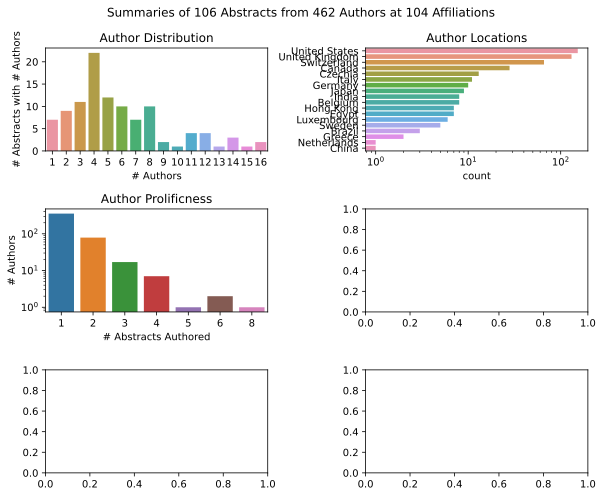

In [10]:
fix, ((lax, rax), (blax, brax), (bblax, bbrax)) = plt.subplots(3, 2, figsize=(8.5, 7))

sns.countplot(
    data=df.groupby("submission #").count()["person #"].to_frame(),
    x="person #",
    ax=lax,
)
lax.set_xlabel("# Authors")
lax.set_ylabel("# Abstracts with # Authors")
lax.set_title("Author Distribution")

sns.countplot(
    data=df[["person #", "country"]].drop_duplicates(),
    y="country",
    order=df[["person #", "country"]].drop_duplicates()["country"].value_counts().index,
    ax=rax,
)
rax.set_ylabel("")
rax.set_title("Author Locations")
rax.set_xscale("log")

sns.countplot(
    data=df.groupby("person #")
    .count()["submission #"]
    .sort_values(ascending=False)
    .to_frame(),
    x="submission #",
    ax=blax,
)
blax.set_yscale("log")
blax.set_xlabel("# Abstracts Authored")
blax.set_ylabel("# Authors")
blax.set_title("Author Prolificness")

plt.suptitle(
    f"Summaries of {n_abstracts} Abstracts from {n_authors} Authors at {n_affiliations} Affiliations"
)
plt.tight_layout()
plt.savefig("/Users/cthoyt/Desktop/biocuration2023_abstracts_summary.png", dpi=350)
plt.show()

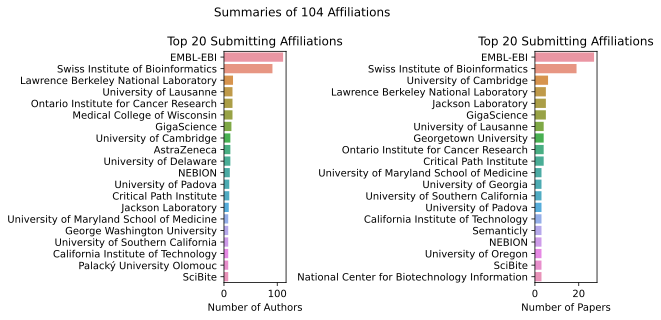

In [11]:
fig, (lax, rax) = plt.subplots(1, 2, figsize=(8.5, 4.5))

n = 20
y, x = zip(*affiliations_counter.most_common(n))
sns.barplot(
    y=list(y),
    x=list(x),
    ax=lax,
)
lax.set_xlabel("Number of Authors")
lax.set_title(f"Top {n} Submitting Affiliations")


affiliation_multiple_submission_rows = list(
    (name, count)
    for name, count in affiliation_to_paper_count.most_common(n)
    if count > 1
)
y, x = zip(*affiliation_multiple_submission_rows)
sns.barplot(
    y=list(y),
    x=list(x),
    ax=rax,
)
rax.set_xlabel("Number of Papers")
rax.set_title(f"Top {n} Submitting Affiliations")


plt.suptitle(f"Summaries of {n_affiliations} Affiliations")
plt.tight_layout()
plt.savefig("/Users/cthoyt/Desktop/biocuration2023_abstracts_summary.png", dpi=350)
plt.show()

In [12]:
print(
    tabulate(
        affiliation_multiple_submission_rows,
        tablefmt="github",
        headers=["Institution", "Submissions"],
    )
)

| Institution                                   |   Submissions |
|-----------------------------------------------|---------------|
| EMBL-EBI                                      |            27 |
| Swiss Institute of Bioinformatics             |            19 |
| University of Cambridge                       |             6 |
| Lawrence Berkeley National Laboratory         |             5 |
| Jackson Laboratory                            |             5 |
| GigaScience                                   |             5 |
| University of Lausanne                        |             4 |
| Georgetown University                         |             4 |
| Ontario Institute for Cancer Research         |             4 |
| Critical Path Institute                       |             4 |
| University of Maryland School of Medicine     |             3 |
| University of Georgia                         |             3 |
| University of Southern California             |             3 |
| Universi

In [13]:
names = dict(df[["person #", "name"]].drop_duplicates().values)

In [14]:
print(
    tabulate(
        [(names[n], count) for n, count in Counter(df["person #"]).most_common(10)],
        tablefmt="github",
        headers=["Name", "Count"],
    )
)

| Name                   |   Count |
|------------------------|---------|
| Alan Bridge            |       8 |
| Sandra Orchard         |       6 |
| Nicole Redaschi        |       6 |
| Henning Hermjakob      |       5 |
| Marc Robinson-Rechavi  |       4 |
| Frédéric B. Bastian    |       4 |
| Christopher J. Mungall |       4 |
| Paul Denis Thomas      |       4 |
| Mary Ann Tuli          |       4 |
| Nicole A. Vasilevsky   |       4 |


In [15]:
submissions_path = directory.joinpath("submission.csv")
submissions_df = pd.read_csv(submissions_path)
del submissions_df["notified"]
del submissions_df["reviews sent"]
del submissions_df["last updated"]

def _map(s):
    s=s.lower()
    if "lightning" in s:
        return "lightning"
    if "oral" in s:
        return "oral"
    elif "poster" in s:
        return "poster"
    elif "reject" in s:
        return "reject"
    elif s == "the submission has been withdrawn":
        return None
    raise ValueError(s)

submissions_df["decision"] = submissions_df["decision"].map(_map)
submissions_df = submissions_df[submissions_df["decision"].notna()] 

submissions_df.head()

,#,title,authors,submitted,form fields,keywords,decision,abstract
0,259,Single Cell Expression Atlas and FlyBase - the...,"Nancy George, Irene Papatheodorou, Anja Fullgr...",2022-12-15 10:35,(orcid) 0000-0003-4183-8865\n(type) both,single cell sequencing\ndrosophila melanogaste...,oral,The Single Cell Expression Atlas knowledge bas...
1,301,Curated information about single-cell RNA-seq ...,"Sagane Joye, Anne Niknejad, Marc Robinson-Rech...",2023-01-03 16:33,(orcid) 0000-0003-4771-6113\n(type) oral,Single-cell\nscRNA-seq\ntechnologies\nprotocol...,poster,Single-cell RNA sequencing (scRNA-seq) technol...
2,371,A 20 year perspective on FAIR and TRUST-worthy...,"Lynn M Schriml, J. Allen Baron, Dustin Olley, ...",2022-12-16 19:50,(orcid) 0000-0001-8910-9851\n(type) both,data standards\ndisease biocuration\nontology\...,oral,Making human disease knowledge FAIR and TRUST-...
3,421,Glycan biomarker curation for integration with...,"Karina Martinez, Daniel Lyman, Jeet Vora, Nath...",2022-12-20 22:12,(orcid) 0000-0003-2035-8459\n(type) poster,glycan\nbiomarker\nglycosylation\ncuration,poster,Altered glycosylation is associated with almos...
4,671,Predicting protein metal binding sites with ar...,"Rossana Zaru, Vishal Joshi, Sandra Orchard and...",2022-12-20 10:18,(orcid) 0000-0002-3358-4423\n(type) both,curation\nUniProt\nprotein sequence annotation...,lightning,Metal binding is essential for many protein fu...


In [16]:
data_directory = here.parent.joinpath("_data")
import yaml

def _process_authors(s):
    p = [a.strip() for a in authors.split(",")]
    if " and " in p[-1]:
        return [*p[:-1], *(a.strip() for a in p[-1].split(" and "))]
    return p
    
    
for decision, sdf in submissions_df.sort_values("submitted").groupby("decision"):
    if decision == "reject":
        continue
    d = []
    for _n, title, authors, submitted, _, keywords, _, abstract in sdf.values:
        d.append({
            "title": title.strip().strip(".").strip(),
            "authors": [
                {"label": a.strip(), "series_ordinal": i}
                for i, a in enumerate(_process_authors(authors), start=1)
            ],
            "keywords": [k.strip() for k in keywords.split("\n")],
            "abstract": abstract.strip(),
            "submitted": submitted,
        })
    with data_directory.joinpath(decision).with_suffix(".yml").open("w") as file:
        yaml.safe_dump(d, file, allow_unicode=True)